## ヒストグラム、ビニング、密度

In [3]:
# 必要なパッケージのインポートとjupyter notebookの設定
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

(array([  5.,  17.,  67., 133., 218., 222., 205.,  91.,  31.,  11.]),
 array([-3.20118149, -2.59728491, -1.99338833, -1.38949174, -0.78559516,
        -0.18169858,  0.42219801,  1.02609459,  1.62999117,  2.23388776,
         2.83778434]),
 <a list of 10 Patch objects>)

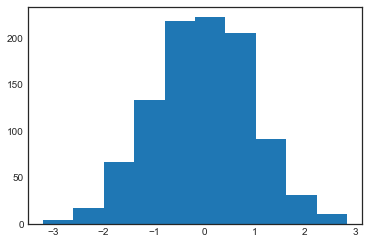

In [4]:
data = np.random.randn(1000)
plt.hist(data)

(array([0.00496774, 0.        , 0.01987095, 0.01490321, 0.01987095,
        0.04967738, 0.06954833, 0.1043225 , 0.15896762, 0.17387083,
        0.21361273, 0.27322559, 0.31793523, 0.35767714, 0.40735452,
        0.38251583, 0.36761261, 0.3527094 , 0.39741904, 0.35767714,
        0.26329011, 0.16890309, 0.15399988, 0.12916119, 0.06954833,
        0.04967738, 0.03477417, 0.01987095, 0.02483869, 0.00993548]),
 array([-3.20118149, -2.99988263, -2.79858377, -2.59728491, -2.39598605,
        -2.19468719, -1.99338833, -1.79208947, -1.5907906 , -1.38949174,
        -1.18819288, -0.98689402, -0.78559516, -0.5842963 , -0.38299744,
        -0.18169858,  0.01960028,  0.22089914,  0.42219801,  0.62349687,
         0.82479573,  1.02609459,  1.22739345,  1.42869231,  1.62999117,
         1.83129003,  2.03258889,  2.23388776,  2.43518662,  2.63648548,
         2.83778434]),
 <a list of 1 Patch objects>)

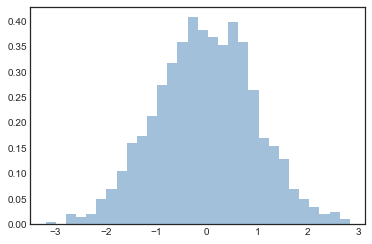

In [5]:
# ヒストグラムのカスタマイズ
plt.hist(data, bins=30, normed=True, alpha=0.5,
                histtype='stepfilled', color='steelblue',
                edgecolor='none')

(array([0.01155691, 0.00577845, 0.02311381, 0.01444613, 0.02311381,
        0.02600304, 0.0548953 , 0.04044917, 0.07511988, 0.10401215,
        0.16757513, 0.11267983, 0.18491049, 0.13290441, 0.16757513,
        0.18202126, 0.21669198, 0.21380275, 0.19646739, 0.20513507,
        0.13868286, 0.11556905, 0.10112292, 0.08956602, 0.08378756,
        0.05200607, 0.02889226, 0.0433384 , 0.02311381, 0.01444613,
        0.00577845, 0.02311381, 0.00288923, 0.00288923, 0.        ,
        0.00288923, 0.        , 0.        , 0.        , 0.00288923]),
 array([-2.67534641, -2.32923299, -1.98311958, -1.63700616, -1.29089274,
        -0.94477932, -0.59866591, -0.25255249,  0.09356093,  0.43967435,
         0.78578776,  1.13190118,  1.4780146 ,  1.82412801,  2.17024143,
         2.51635485,  2.86246827,  3.20858168,  3.5546951 ,  3.90080852,
         4.24692194,  4.59303535,  4.93914877,  5.28526219,  5.63137561,
         5.97748902,  6.32360244,  6.66971586,  7.01582928,  7.36194269,
         7.70805

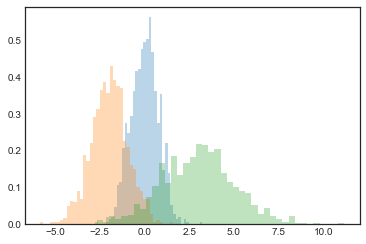

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [7]:
# ヒストグラムの計算だけを行う場合は、np.histogram()関数を利用する。
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 22 200 440 296  42]
[-3.20118149 -1.99338833 -0.78559516  0.42219801  1.62999117  2.83778434]


### ２次元のヒストグラムとビニング

In [20]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

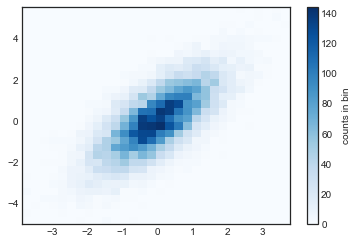

In [21]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [22]:
# plt.hist2dに対応して、np.histogram2dが存在する
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

２より大きい次元で一般化したビニングを行うには、np.histogramdd関数を使用する。

### 六角形のビニング

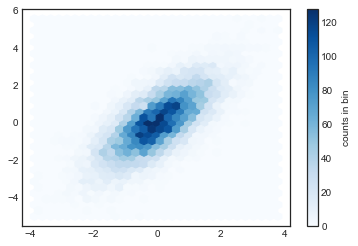

In [23]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='counts in bin')

### カーネル密度推定

In [24]:
from scipy.stats import gaussian_kde

In [25]:
# 配列のサイズを[N次元, Nサンプル]に揃える
data = np.vstack([x, y])
kde = gaussian_kde(data)

In [26]:
# 均一なグリッド上で評価する
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

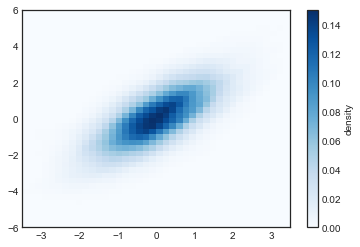

In [29]:
# 結果をイメージとして描画する
plt.imshow(Z.reshape(Xgrid.shape),
                  origin='lower', aspect='auto',
                  extent=[-3.5, 3.5, -6, 6],
                  cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")